> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [317]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import csv
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [318]:
# Load your data and print out a few lines. Perform operations to inspect data
#types and look for instances of missing or possibly errant data.
tmdb = pd.read_csv('tmdb-movies.csv')
tmdb.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline      ...       \
0              The park is open.      ...        
1             What a Lovely Day.      ...        
2     One Choice Can Destroy You      ...        
3  Every generation has a story.      ...        
4            Vengeance Hits Home      ...        

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

# > **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).


**Q1) Runtime of Movies among the Years ?**

**Q2) What the Most 5 popularity of movies?**

**Q3) what is the revenue of all movies by their Year ?**
### Data Cleaning (Replace this with more specific notes!)

**A) Some columns I think to unused it so,I will remove idb_id, vote_count, production_company, keywords, homepage ,revenue_adj,budget_adj, vote_average,tagline,overview.**


**B) Removing the duplicacy.**


**C) Some movies in DB have zero budget or revenue, that is there value has not been recorded so we will be Replacing zero with NAN then Deleting all the NaN values.**

In [319]:
#creating a list to be deleted
tmdb.drop(['imdb_id', 'budget_adj', 'revenue_adj', 'homepage', 'tagline', 'overview', 'keywords', 'production_companies', 'vote_count', 'vote_average'], axis=1, inplace=True)
tmdb.head()

id  popularity     budget     revenue                original_title  \
0  135397   32.985763  150000000  1513528810                Jurassic World   
1   76341   28.419936  150000000   378436354            Mad Max: Fury Road   
2  262500   13.112507  110000000   295238201                     Insurgent   
3  140607   11.173104  200000000  2068178225  Star Wars: The Force Awakens   
4  168259    9.335014  190000000  1506249360                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

   runtime                                     genres release_date  \
0      124  Action|Adventure|Science Fiction|Thriller       6/9/15   
1      120  Action|Adventure|Science Fiction|Thriller      5/13/15   
2      119         Adventure|Science Fiction|Thriller      3/18/15   
3      136   Action|Adventure|Science Fiction|Fantasy     12/15/15   
4      137                      Action|Crime|Thriller       4/1/15   

   release_year  
0          2015  
1          2015  
2          2015  
3          2015  
4          2015

In [320]:
#Remove duplicated
tmdb.drop_duplicates(inplace=True)
tmdb.head()

id  popularity     budget     revenue                original_title  \
0  135397   32.985763  150000000  1513528810                Jurassic World   
1   76341   28.419936  150000000   378436354            Mad Max: Fury Road   
2  262500   13.112507  110000000   295238201                     Insurgent   
3  140607   11.173104  200000000  2068178225  Star Wars: The Force Awakens   
4  168259    9.335014  190000000  1506249360                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

   runtime                                     genres release_date  \
0      124  Action|Adventure|Science Fiction|Thriller       6/9/15   
1      120  Action|Adventure|Science Fiction|Thriller      5/13/15   
2      119         Adventure|Science Fiction|Thriller      3/18/15   
3      136   Action|Adventure|Science Fiction|Fantasy     12/15/15   
4      137                      Action|Crime|Thriller       4/1/15   

   release_year  
0          2015  
1          2015  
2          2015  
3          2015  
4          2015

In [321]:
tem_col = ['budget', 'revenue', 'runtime']
#Replacing all the 0 values with NaN
##Deleting all the NaN values
tmdb[temp_col] = tmdb[temp_col].replace(0, np.NAN)
#subset it define to look for missing values
#Removing all NaN value in temp_list 
tmdb.dropna(subset = temp_col, inplace = True)
rows, col = tmdb.shape
tmdb.head(35)

id  popularity       budget       revenue  \
0   135397   32.985763  150000000.0  1.513529e+09   
1    76341   28.419936  150000000.0  3.784364e+08   
2   262500   13.112507  110000000.0  2.952382e+08   
3   140607   11.173104  200000000.0  2.068178e+09   
4   168259    9.335014  190000000.0  1.506249e+09   
5   281957    9.110700  135000000.0  5.329505e+08   
6    87101    8.654359  155000000.0  4.406035e+08   
7   286217    7.667400  108000000.0  5.953803e+08   
8   211672    7.404165   74000000.0  1.156731e+09   
9   150540    6.326804  175000000.0  8.537086e+08   
10  206647    6.200282  245000000.0  8.806746e+08   
11   76757    6.189369  176000003.0  1.839877e+08   
12  264660    6.118847   15000000.0  3.686941e+07   
13  257344    5.984995   88000000.0  2.436371e+08   
14   99861    5.944927  280000000.0  1.405036e+09   
15  273248    5.898400   44000000.0  1.557601e+08   
16  260346    5.749758   48000000.0  3.257714e+08   
17  102899    5.573184  130000000.0  5.186022e+08   
18  150689    5.556818   95000000.0  5.423514e+08   
19  131634    5.476958  160000000.0  6.505234e+08   
20  158852    5.462138  190000000.0  2.090357e+08   
21  307081    5.337064   30000000.0  9.170983e+07   
22  254128    4.907832  110000000.0  4.704908e+08   
23  216015    4.710402   40000000.0  5.696515e+08   
24  318846    4.648046   28000000.0  1.333465e+08   
25  177677    4.566713  150000000.0  6.823301e+08   
26  214756    4.564549   68000000.0  2.158636e+08   
27  207703    4.503789   81000000.0  4.038021e+08   
28  314365    4.062293   20000000.0  8.834647e+07   
29  294254    3.968891   61000000.0  3.112569e+08   
31  198184    3.899557   49000000.0  1.020693e+08   
32  254470    3.877764   29000000.0  2.875062e+08   
33  296098    3.648210   40000000.0  1.626105e+08   
34  257445    3.644541   58000000.0  1.501708e+08   
35  264644    3.557846    6000000.0  3.540176e+07   

                           original_title  \
0                          Jurassic World   
1                      Mad Max: Fury Road   
2                               Insurgent   
3            Star Wars: The Force Awakens   
4                               Furious 7   
5                            The Revenant   
6                      Terminator Genisys   
7                             The Martian   
8                                 Minions   
9                              Inside Out   
10                                Spectre   
11                      Jupiter Ascending   
12                             Ex Machina   
13                                 Pixels   
14                Avengers: Age of Ultron   
15                      The Hateful Eight   
16                                Taken 3   
17                                Ant-Man   
18                             Cinderella   
19  The Hunger Games: Mockingjay - Part 2   
20                           Tomorrowland   
21                               Southpaw   
22                            San Andreas   
23                   Fifty Shades of Grey   
24                          The Big Short   
25     Mission: Impossible - Rogue Nation   
26                                  Ted 2   
27           Kingsman: The Secret Service   
28                              Spotlight   
29         Maze Runner: The Scorch Trials   
31                                Chappie   
32                        Pitch Perfect 2   
33                        Bridge of Spies   
34                             Goosebumps   
35                                   Room   

                                                 cast  \
0   Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1   Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2   Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3   Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4   Vin Diesel|Paul Walker|Jason Statham|Michelle ...   
5   Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...   
6   Arnold Schwarzenegger|Jason Clarke|Emilia Clar...   
7   Matt Damon|Jessica

In [322]:
tmdb['Profit'] = tmdb['revenue'] - tmdb['budget']
tmdb.head()

id  popularity       budget       revenue  \
0  135397   32.985763  150000000.0  1.513529e+09   
1   76341   28.419936  150000000.0  3.784364e+08   
2  262500   13.112507  110000000.0  2.952382e+08   
3  140607   11.173104  200000000.0  2.068178e+09   
4  168259    9.335014  190000000.0  1.506249e+09   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

   runtime                                     genres release_date  \
0    124.0  Action|Adventure|Science Fiction|Thriller       6/9/15   
1    120.0  Action|Adventure|Science Fiction|Thriller      5/13/15   
2    119.0         Adventure|Science Fiction|Thriller      3/18/15   
3    136.0   Action|Adventure|Science Fiction|Fantasy     12/15/15   
4    137.0                      Action|Crime|Thriller       4/1/15   

   release_year        Profit  
0          2015  1.363529e+09  
1          2015  2.284364e+08  
2          2015  1.852382e+08  
3          2015  1.868178e+09  
4          2015  1.316249e+09

# <a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 ( Runtime of the Movies among the Years ?**)


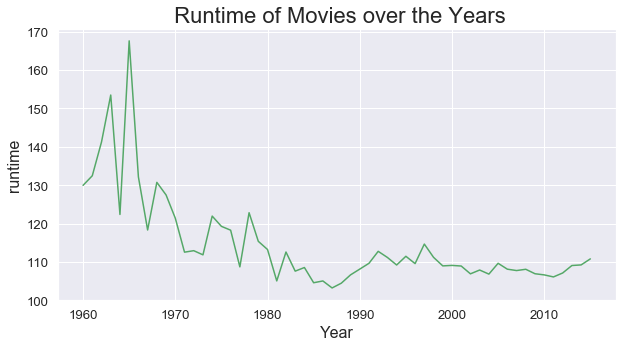

In [323]:
#i will using Line plot for this analysis
#Since we want to know the Runtime of movies for every year therefore we have to sum all the movies of a particular year
#find average 
tmdb.groupby('release_year')['runtime'].mean().plot(kind='line', figsize = (10, 5), color = 'g')
#assign axis
plt.title(' Runtime of Movies over the Years', fontsize = 22)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('runtime', fontsize = 16);

## we can see it apper runtime decreased among years highest in 1965 was around 169 minute .The runtime of movies has decreased with each passsing year. The lowest was around 108 mintues. Now, movies tend to 111 minute.

###  Question 2  (**What the top 5,lowest 5 popularity of movies? ** )

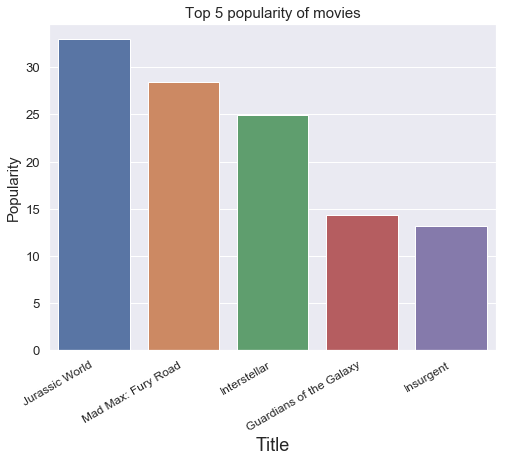

In [324]:
#barplot of the top 5 movies by popularity 
#I used plot in descending order .
movies_Popularity=tmdb.groupby('original_title').sum().sort_values(by = 'popularity', ascending = False )[0:5]

#get original_title column back in dataframe
movies_Popularity['original_title'] = movies_Popularity.index.get_level_values(0)
#set size
plt.figure(figsize=(8,6))
ab=sns.barplot(x = 'original_title', y ='popularity',data =movies_Popularity );
ab.set_xticklabels(ab.get_xticklabels(),rotation = 30, ha ='right', fontsize = 12 );
#assign axis
plt.xlabel('Title', fontsize = 18);
plt.ylabel('Popularity', fontsize = 15);
plt.title('Top 5 popularity of movies', fontsize = 15);
plt.show()

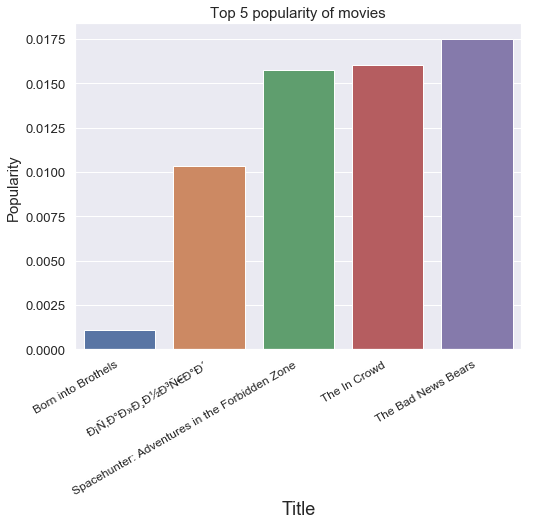

In [325]:
#barplot of the top 5 movies by popularity 
#I used plot in ascending order .
movies_Popularity=tmdb.groupby('original_title').sum().sort_values(by = 'popularity', ascending = True )[0:5]

#get original_title column back in dataframe
movies_Popularity['original_title'] = movies_Popularity.index.get_level_values(0)
#set size
plt.figure(figsize=(8,6))
ab=sns.barplot(x = 'original_title', y ='popularity',data =movies_Popularity );
ab.set_xticklabels(ab.get_xticklabels(),rotation = 30, ha ='right', fontsize = 12 );
#assign axis
plt.xlabel('Title', fontsize = 18);
plt.ylabel('Popularity', fontsize = 15);
plt.title('Top 5 popularity of movies', fontsize = 15);
plt.show()

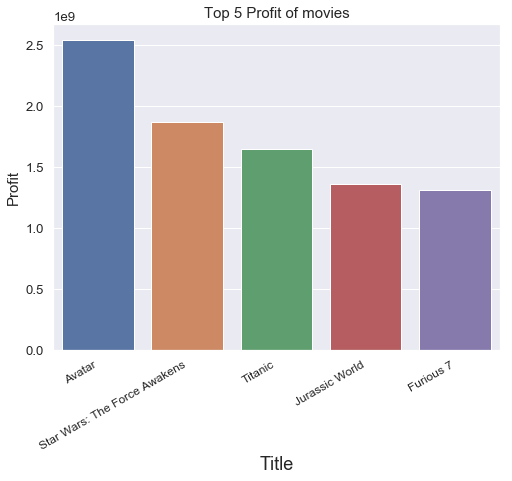

In [326]:
#barplot of the top 5 movies by popularity 
#I used plot in descending order .
movies_Popularity=tmdb.groupby('original_title').sum().sort_values(by = 'Profit', ascending = False )[0:5]

#get original_title column back in dataframe
movies_Popularity['original_title'] = movies_Popularity.index.get_level_values(0)
#set size
plt.figure(figsize=(8,6))
ab=sns.barplot(x = 'original_title', y ='Profit',data =movies_Popularity );
ab.set_xticklabels(ab.get_xticklabels(),rotation = 30, ha ='right', fontsize = 12 );
#assign axis
plt.xlabel('Title', fontsize = 18);
plt.ylabel('Profit', fontsize = 15);
plt.title('Top 5 Profit of movies', fontsize = 15);
plt.show()

# we can see it top 5 movies by popularity  (Jurassic World)..etc , lowest (Born into Brothels)

# Q3) what is the revenue &Profit of all movies by their Year ?

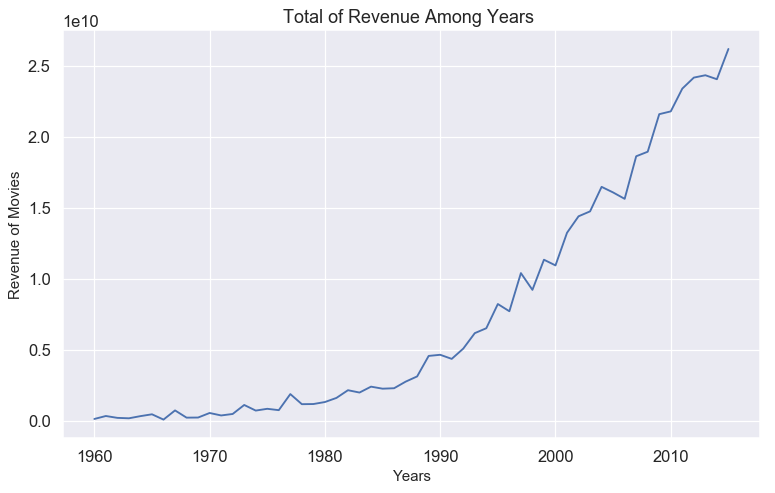

In [327]:
#Analysis using line plot
revenue_year = tmdb.groupby('release_year')['revenue'].sum()#summing revenue among years
#set size
plt.figure(figsize=(10,6), dpi = 90)
#assign axis
plt.xlabel('Years', fontsize = 12)
plt.ylabel('Revenue of Movies', fontsize = 12)
#title of the line plot
plt.title('Total of Revenue Among Years ')
#plotting the graph
plt.plot(revenue_year)
#displaying it
plt.show()

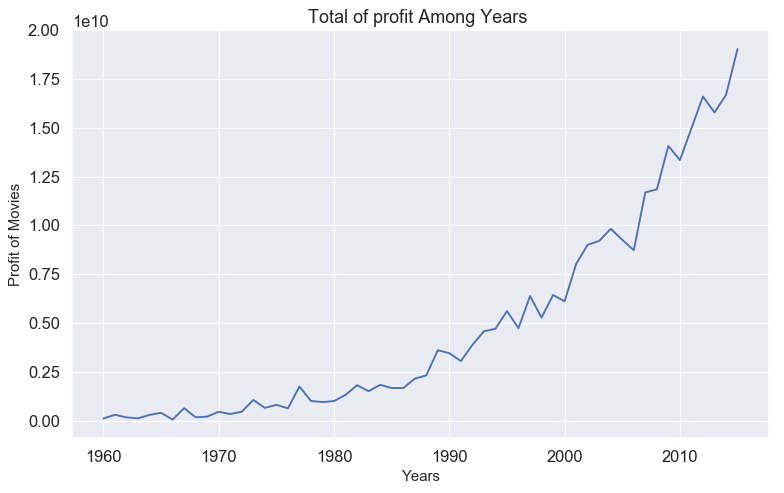

In [328]:
#Analysis using line plot
Profit_year = tmdb.groupby('release_year')['Profit'].sum()#summing revenue among years
#set size
plt.figure(figsize=(10,6), dpi = 90)
#assign axis
plt.xlabel('Years', fontsize = 12)
plt.ylabel('Profit of Movies', fontsize = 12)
#title of the line plot
plt.title('Total of profit Among Years ')
#plotting the graph
plt.plot(Profit_year)
#displaying it
plt.show()

# Revenue & Profit of Movies incresing among the years 

<a id='conclusions'></a>
## Conclusions



##Maximum Number Of Runtime Movies Release In year 1965.
Minimum Number Of Runtime Movies Release In year 1987.
Average runtime of the movies are decreasing year by year.
top one of movies by popularity is (Jurassic World), lowest is (Born into Brothels).
'Avatar', 'Star Wars' and 'Titanic' are the most profitable movies.
Revenue & Profit both have Direct relation.
